In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/school-tution-dataset/Tuition_Assistance_20240525.csv


# Reading the Dataset

In [51]:
data=pd.read_csv('/kaggle/input/school-tution-dataset/Tuition_Assistance_20240525.csv')

# Displaying first five records

In [52]:
data.head(5)

,Department,Major,Degree,School,Course Title,Course Description,Cost
0,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,INTRODUCTION TO BUSINESS,An introductory course designed to survey the ...,392.0
1,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,MA 160,A general calculus course primarily for busine...,392.0
2,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,INTRO TO AMERICAN MUSIC,A survey of American popular music from the tu...,392.0
3,Health & Human Services,Business/Admin./Mgmt.,Masters (MA/MS/MPH/etc.),BOWIE STATE UNIVERSITY,PUBLIC POLICY ANALYSIS,Focus is on the analysis of costs and benefits...,1062.0
4,Health & Human Services,Other/Misc.,Masters (MA/MS/MPH/etc.),Mount St Mary's University,MHA 500 CONTEMPORARY ISSUES IN HEALTH CARE,"The historical, current, and future organizati...",1569.0


# Converting Data into DataFrame for future Analysis

In [53]:
data=pd.DataFrame(data)

# Checking the Shape of Data- Rows and Columns (Count)

In [55]:
data.shape

(4368, 7)

# Checking the Data type of variables

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Department          4368 non-null   object 
 1   Major               3883 non-null   object 
 2   Degree              4368 non-null   object 
 3   School              4368 non-null   object 
 4   Course Title        4368 non-null   object 
 5   Course Description  4171 non-null   object 
 6   Cost                4368 non-null   float64
dtypes: float64(1), object(6)
memory usage: 239.0+ KB


# Checking Whether the Data has Null Values or Not

In [57]:
data.isnull().sum()

Department              0
Major                 485
Degree                  0
School                  0
Course Title            0
Course Description    197
Cost                    0
dtype: int64

# Checking Percentage wise Null Values

In [58]:
(data.isnull().sum()/len(data))*100

Department             0.000000
Major                 11.103480
Degree                 0.000000
School                 0.000000
Course Title           0.000000
Course Description     4.510073
Cost                   0.000000
dtype: float64

# Display the 5-Point Summary

In [59]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cost,4368.0,786.263024,533.319613,0.0,366.0,700.0,1015.0,2300.0


# Separting variables into Numerical and Categorical Columns

In [60]:
num_cols=data.select_dtypes(include='number')

In [61]:
num_cols.columns

Index(['Cost'], dtype='object')

# Checking the Correlation

In [62]:
num_cols.corr()

,Cost
Cost,1.0


# Checking the Variance

In [63]:
num_cols.var()

Cost    284429.809115
dtype: float64

# Checking the Standard Deviation 

In [99]:
num_cols.std()

Cost    533.319613
dtype: float64

In [64]:
cat_cols=data.select_dtypes(include='object')

In [65]:
cat_cols.columns

Index(['Department', 'Major', 'Degree', 'School', 'Course Title',
       'Course Description'],
      dtype='object')

# Checking the Outliers using Boxplot

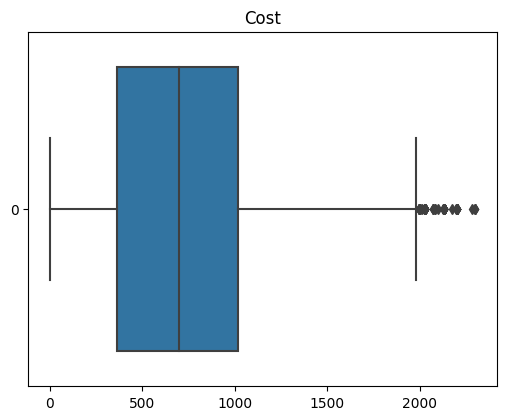

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
t=1
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(num_cols[i], orient='h')
    plt.title(i)
    t+=1

plt.tight_layout()
plt.show()

# Treating the Outlier using IQR Method

In [67]:
q1=data['Cost'].quantile(0.25)
q3=data['Cost'].quantile(0.75)

iqr=q3-q1

lower=q1-1.5*(iqr)
upper=q3+1.5*(iqr)

upper_array=np.where(data['Cost']>=upper)[0]
lower_array=np.where(data['Cost']<=lower)[0]

data.drop(index=upper_array, inplace=True)
data.drop(index=lower_array, inplace=True)


# Again checking the shape of data after removing outlier

In [68]:
print(f'After removal of outlier new data consists of : {data.shape[0]} rows and {data.shape[1]} columns')

After removal of outlier new data consists of : 4239 rows and 7 columns


In [69]:
cat_cols.columns

Index(['Department', 'Major', 'Degree', 'School', 'Course Title',
       'Course Description'],
      dtype='object')

# Performing Exploratory Data Analysis on Categorical and Numerical Columns

In [70]:
cat_cols['Major'].value_counts()

Major
Business/Admin./Mgmt.               435
Criminal Justice                    425
Other/Misc.                         306
Not Listed                          258
Accounting (Business)               200
                                   ... 
American Studies                      1
Undecided (Letters and Sciences)      1
Bioengineering                        1
Urban Forestry                        1
International Business                1
Name: count, Length: 91, dtype: int64

In [71]:
cat_cols['Department'].value_counts()

Department
Police                                        1377
Fire/Rescue Services                           895
Health & Human Services                        741
Transportation                                 239
Correction & Rehabilitation                    221
General Services                               111
Liquor Control                                  89
Environmental Protection                        73
Investment Trustees                             60
Housing & Community Affairs                     59
Finance                                         56
Human Resources                                 53
Libraries                                       52
Recreation                                      50
Technology Services                             48
State's Attorney                                45
Community Use Public Facilities                 42
Permitting Services                             32
County Attorney                                 25
Public Information  

In [72]:
cat_cols['Degree'].value_counts()

Degree
Bachelors (BA/BS)           1393
Masters (MA/MS/MPH/etc.)     918
AA                           667
Certificate                  496
Non-Degree                   487
Other                        308
Ph.D. (DCS)                   37
Juris Doctor                  35
Ph.D. (DDE)                   27
Name: count, dtype: int64

In [73]:
cat_cols['School'].value_counts()

School
University of Maryland - University College        665
Montgomery College Rockville Campus                237
UNIVERSITY OF MARYLAND, UNIVERSITY COLLEGE         210
MONTGOMERY COMMUNITY COLLEGE                       195
FREDERICK COMMUNITY COLLEGE                        141
                                                  ... 
MID-ATLANTIC REGIONAL GANG INVESTIGATOS NETWORK      1
TRILOGY HSE                                          1
Cypress Creek EMS                                    1
Seton Hall University                                1
SIMPLILEARN SOLUTIONS                                1
Name: count, Length: 382, dtype: int64

In [74]:
cat_cols['Course Title'].value_counts()

Course Title
TEAM SKILLS RESCUE WORKSHOP                              18
DYNAMIC CQC                                              17
GLOCK ARMORER'S COURSE                                   15
COMBAT PISTOL                                            13
STATISTICS                                               12
                                                         ..
FINITE MATH 106                                           1
FUNDAMENTALS OF ELECTRICAL WIRING, BLDG150 & BLDG150L     1
PRINCIPLES OF SUSTAINABILITY                              1
INTERMEDIATE SPANISH II                                   1
UNIX/LINUX SYSTEM ADMINISTRATION                          1
Name: count, Length: 3296, dtype: int64

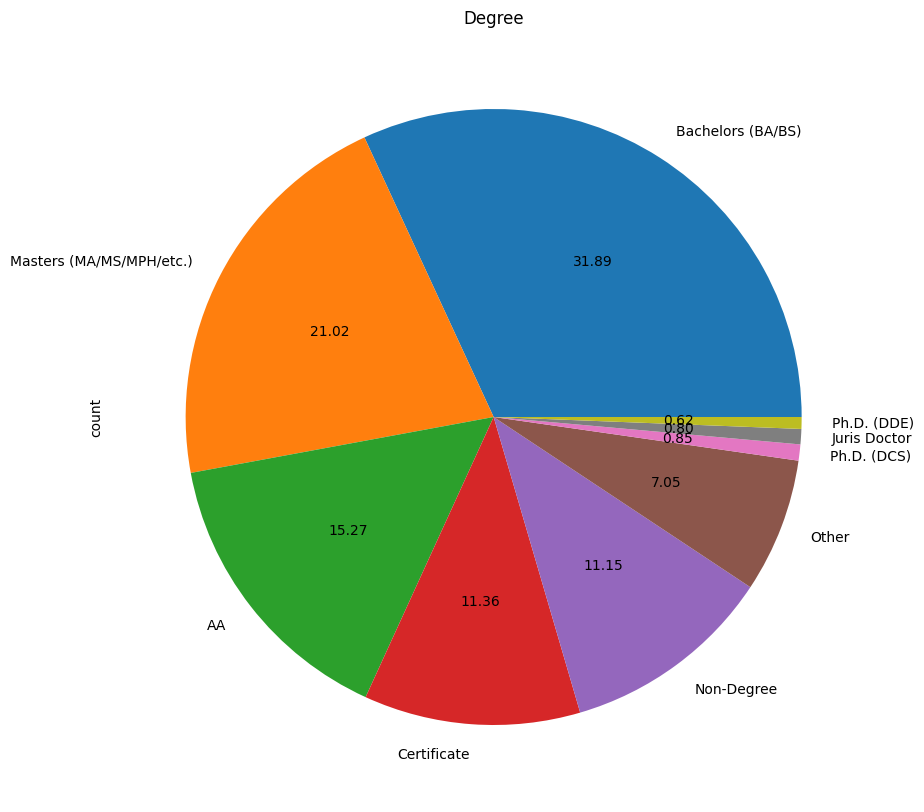

In [75]:
plt.figure(figsize=(15,10))
cat_cols['Degree'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Degree')
plt.show()

In [76]:
print('Observation: 31% of students are pursuing Bachelors degree (BA/BS), 21% of students are pursuing Master degree (MA/MS/MPH) and 1.47% of students chooses Higher Education (PhD. in DDE &DCS)')

Observation: 31% of students are pursuing Bachelors degree (BA/BS), 21% of students are pursuing Master degree (MA/MS/MPH) and 1.47% of students chooses Higher Education (PhD. in DDE &DCS)


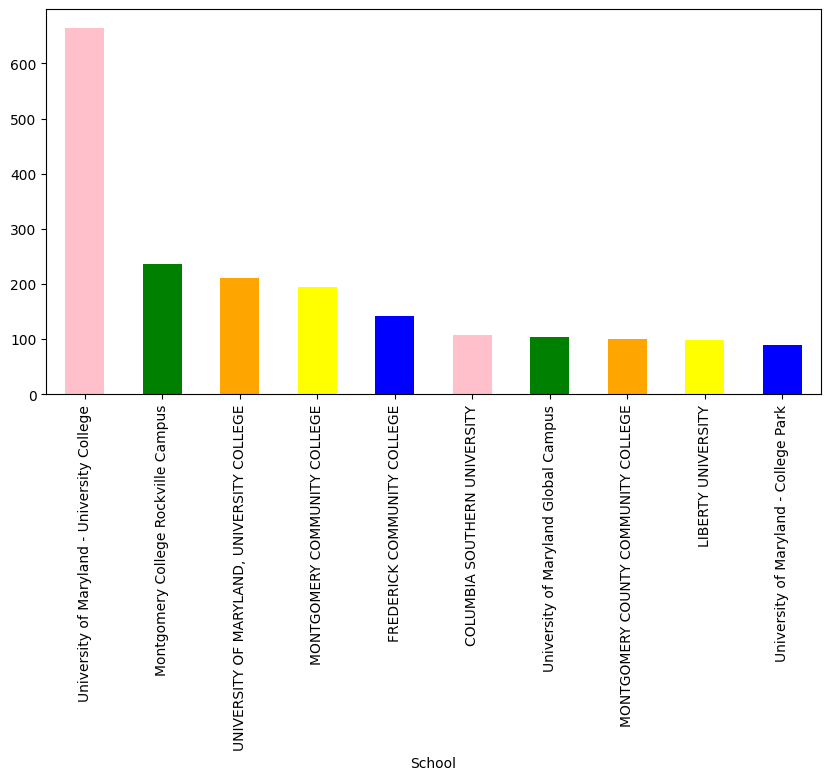

In [77]:
# We will take top-10 schools based on the  Highest students counts 

plt.figure(figsize=(10,5))
cat_cols['School'].value_counts()[:10].plot(kind='bar', color=['Pink','Green','Orange','Yellow','Blue'])

plt.show()

In [78]:
print('Observation: University of Maryland has higgest no. of student studied in that university')

Observation: University of Maryland has higgest no. of student studied in that university


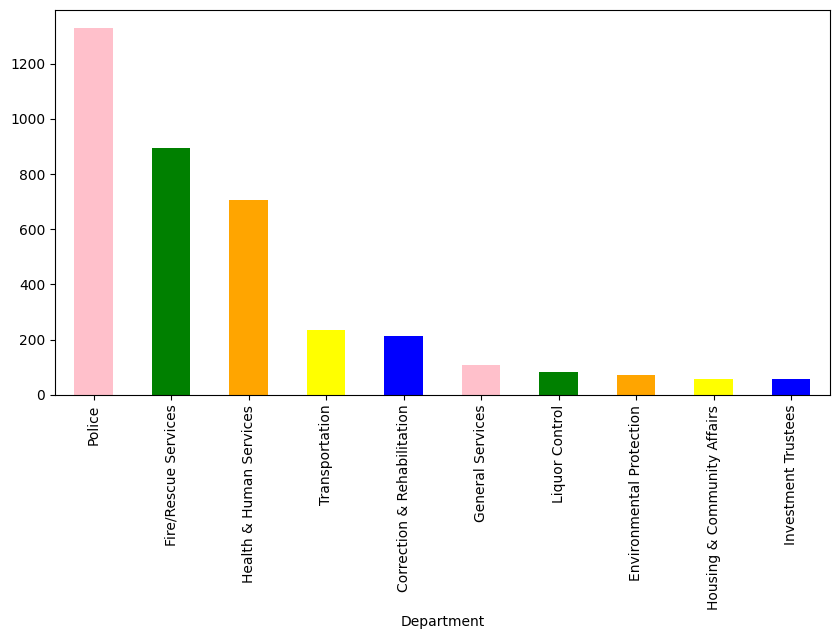

In [79]:
# We will plot top 10 Departmnets which having the highest count

plt.figure(figsize=(10,5))
data['Department'].value_counts()[:10].plot(kind='bar',color=['Pink','Green','Orange','Yellow','Blue'])
plt.show()

In [80]:
print('Observation: We can clearly observe that Department of Police have highest no. of people working in that')

Observation: We can clearly observe that Department of Police have highest no. of people working in that


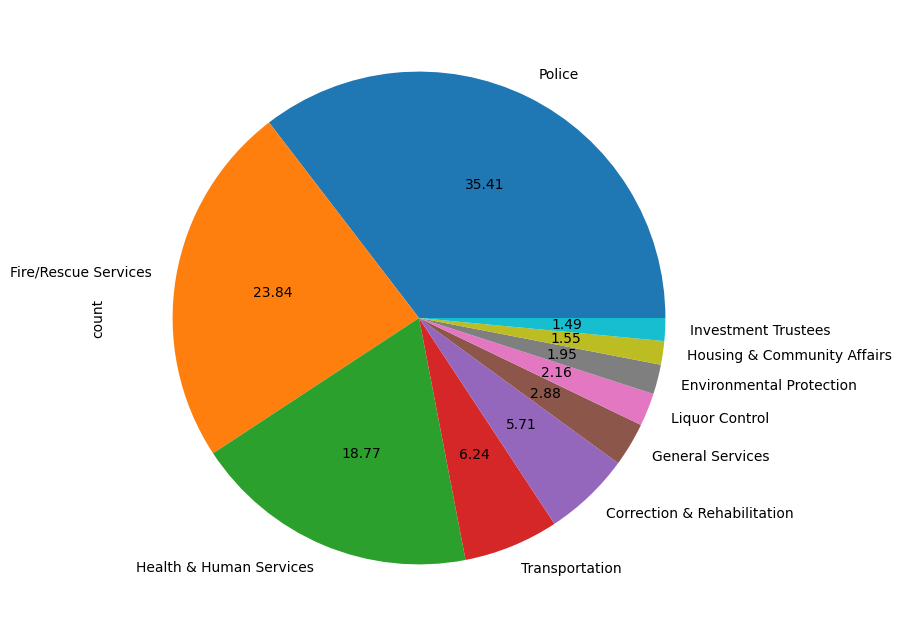

'Observation: 35% of people works in Police, 23% works in Fire/Rescue Service, 18% of work in Health &Human Service'

In [81]:
# We will plot top 10 Departmnets which having the highest count

plt.figure(figsize=(10,8))
data['Department'].value_counts()[:10].plot(kind='pie', autopct='%.2f')
plt.show()
display('Observation: 35% of people works in Police, 23% works in Fire/Rescue Service, 18% of work in Health &Human Service')

<Axes: xlabel='Major'>

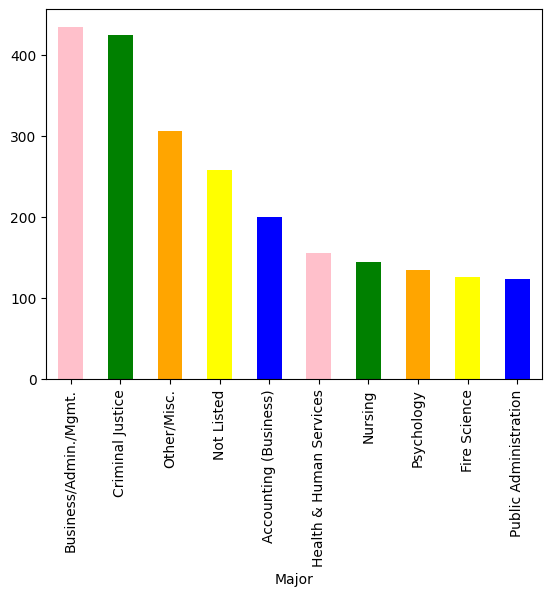

In [82]:
#Top-10 Major course opted

cat_cols['Major'].value_counts()[:10].plot(kind='bar',color=['Pink','Green','Orange','Yellow','Blue'])

In [83]:
#People who do not have a degree works in which Departmnet
data[data['Degree']=='Non-Degree']['Department'].value_counts()

Department
Fire/Rescue Services            134
Health & Human Services         110
Police                           39
Investment Trustees              30
Transportation                   22
Liquor Control                   18
Human Resources                  13
General Services                 13
Correction & Rehabilitation      11
Recreation                       11
Environmental Protection         10
Finance                          10
Technology Services               8
Housing & Community Affairs       8
Management & Budget               8
Libraries                         5
Permitting Services               5
Public Information                3
State's Attorney                  3
Animal services                   2
County Attorney                   2
Procurement                       2
Sheriff                           1
Human Rights                      1
Community Engagement Cluster      1
Board of Elections                1
Name: count, dtype: int64

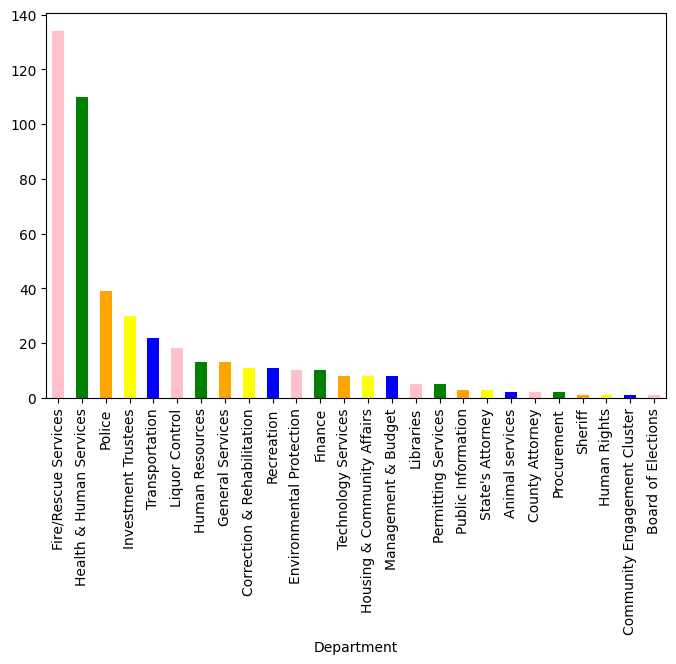

'People who don not have a degree, majorly works in Fire/Rescue Services and  Health & Human Services'

In [84]:
plt.figure(figsize=(8,5))
data[data['Degree']=='Non-Degree']['Department'].value_counts().plot(kind='bar', color=['Pink','Green','Orange','Yellow','Blue'])
plt.show()
display('People who don not have a degree, majorly works in Fire/Rescue Services and  Health & Human Services')

In [85]:
data[data['Degree']=='Ph.D. (DCS)']['Major'].value_counts()

Major
Health & Human Services     11
African-American Studies     5
Business/Admin./Mgmt.        2
Public Administration        2
Information Technology       1
Other/Misc.                  1
Family Studies               1
Not Listed                   1
Psychology                   1
Name: count, dtype: int64

In [86]:
print('Observation:the data reveals a concentration of Ph.D. (DCS) degree holders in Health & Human Services \n and African-American Studies, with a broader but less pronounced interest in various other fields.')

Observation:the data reveals a concentration of Ph.D. (DCS) degree holders in Health & Human Services 
 and African-American Studies, with a broader but less pronounced interest in various other fields.


In [87]:
data[data['Degree']=='Ph.D. (DDE)']['Major'].value_counts()

Major
Not Listed                          13
Health & Human Services              2
Other/Misc.                          2
General Studies                      2
Professional/Technical               2
Education (Teacher:Undecided)        2
Information Technology               1
Operations Management (Business)     1
Business/Admin./Mgmt.                1
Name: count, dtype: int64

In [88]:
print('Overall, the data reveals a notable trend where the majority of individuals either did not specify their major or are \n categorized  under "Not Listed." Among those who did specify, there is a modest spread across several fields,\n with no single field showing strong dominance. ')

Overall, the data reveals a notable trend where the majority of individuals either did not specify their major or are 
 categorized  under "Not Listed." Among those who did specify, there is a modest spread across several fields,
 with no single field showing strong dominance. 


In [89]:
degree_cost=data.groupby('Degree')['Cost'].sum().sort_values(ascending=False)

In [90]:
print(degree_cost)

Degree
Bachelors (BA/BS)           998409.56
Masters (MA/MS/MPH/etc.)    903761.47
Non-Degree                  352191.06
Certificate                 336587.62
AA                          284928.08
Other                       203162.14
Juris Doctor                 32034.00
Ph.D. (DDE)                  26841.00
Ph.D. (DCS)                  24329.00
Name: Cost, dtype: float64


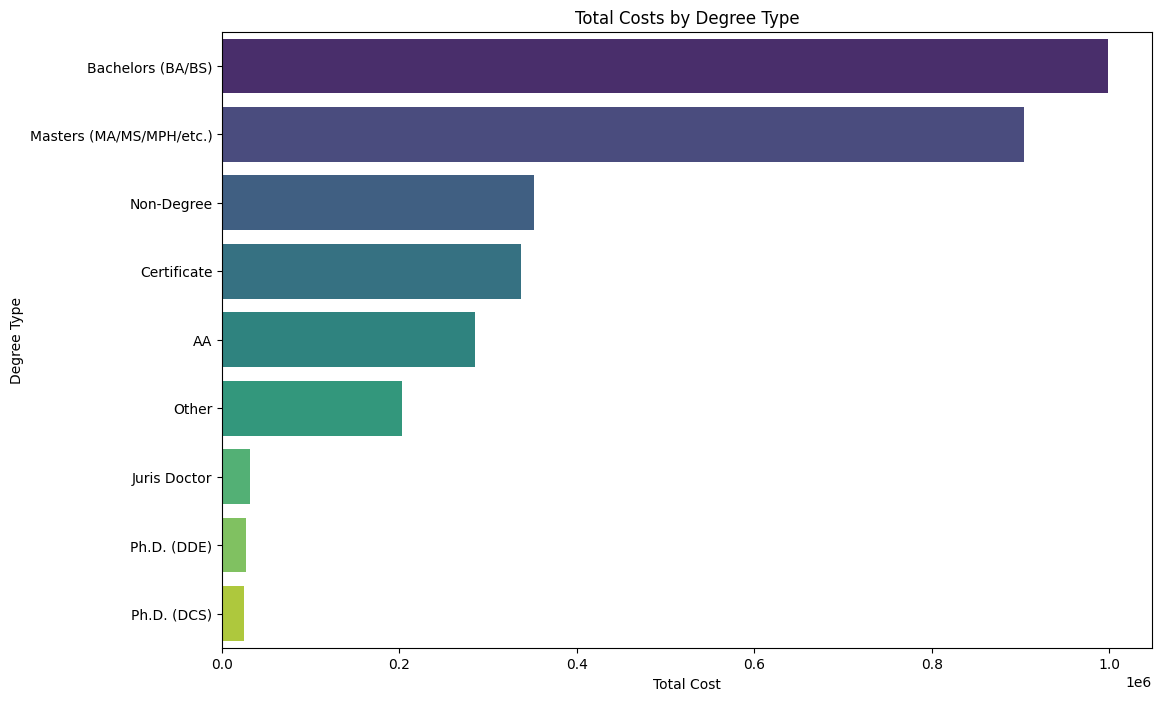

In [91]:
degree_cost_data = {
    'Degree': [
        'Bachelors (BA/BS)', 'Masters (MA/MS/MPH/etc.)', 'Non-Degree', 
        'Certificate', 'AA', 'Other', 'Juris Doctor', 
        'Ph.D. (DDE)', 'Ph.D. (DCS)'
    ],
    'Cost': [
        998409.56, 903761.47, 352191.06, 
        336587.62, 284928.08, 203162.14, 32034.00, 
        26841.00, 24329.00
    ]
}

df = pd.DataFrame(degree_cost_data)
df = df.sort_values(by='Cost', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Cost', y='Degree', data=df, palette='viridis')
plt.title('Total Costs by Degree Type')
plt.xlabel('Total Cost')
plt.ylabel('Degree Type')
plt.show()


In [92]:
department_cost=data.groupby('Department')['Cost'].sum().sort_values(ascending=False)

In [93]:
print(department_cost)

Department
Police                                        1016063.68
Fire/Rescue Services                           674030.74
Health & Human Services                        539212.36
Correction & Rehabilitation                    180980.41
Transportation                                 157596.99
General Services                                70832.70
Liquor Control                                  54240.99
Environmental Protection                        47061.00
Investment Trustees                             45162.25
Human Resources                                 43746.00
Technology Services                             36145.60
Finance                                         35428.93
Libraries                                       34055.13
Housing & Community Affairs                     33126.88
Recreation                                      33020.60
Permitting Services                             28035.00
State's Attorney                                25401.32
Community Use Public

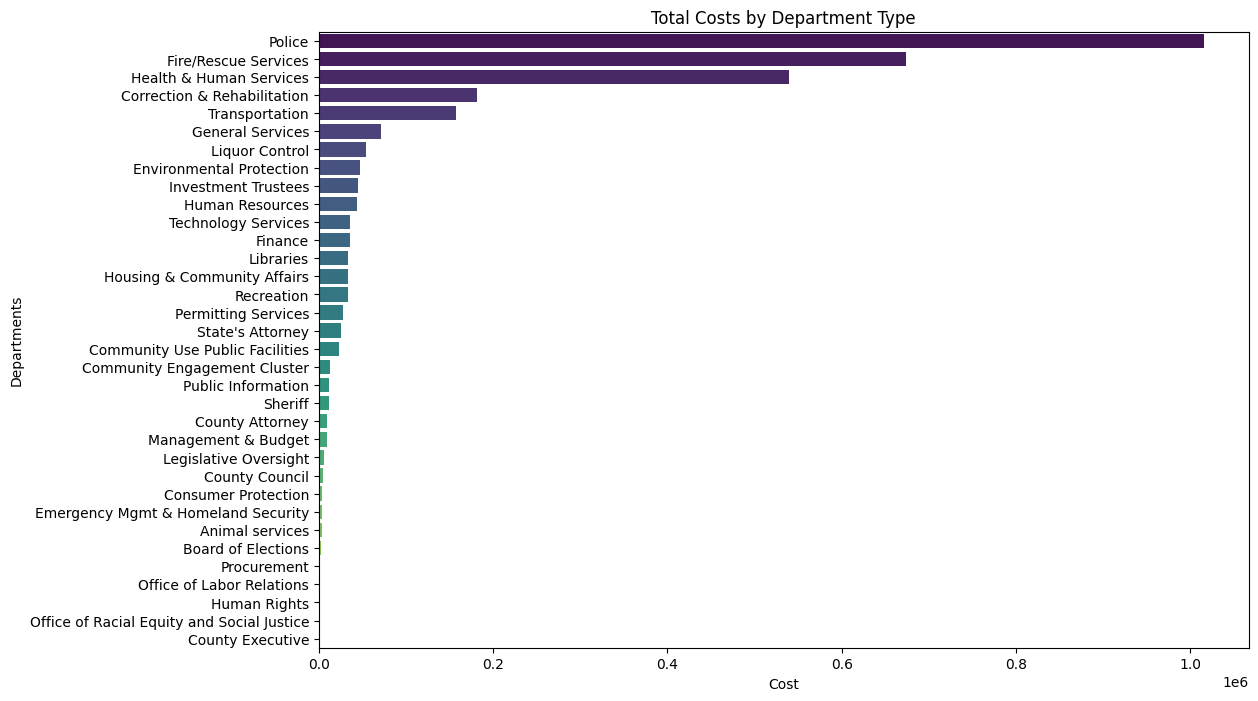

In [94]:
department_cost={
    
    "Departments" :
    [
    "Police", "Fire/Rescue Services", "Health & Human Services", 
    "Correction & Rehabilitation", "Transportation", "General Services", 
    "Liquor Control", "Environmental Protection", "Investment Trustees", 
    "Human Resources", "Technology Services", "Finance", "Libraries", 
    "Housing & Community Affairs", "Recreation", "Permitting Services", 
    "State's Attorney", "Community Use Public Facilities", 
    "Community Engagement Cluster", "Public Information", "Sheriff", 
    "County Attorney", "Management & Budget", "Legislative Oversight", 
    "County Council", "Consumer Protection", "Emergency Mgmt & Homeland Security", 
    "Animal services", "Board of Elections", "Procurement", "Office of Labor Relations", 
    "Human Rights", "Office of Racial Equity and Social Justice", "County Executive" 
    ],
    "Cost" : [
    1016063.68, 674030.74, 539212.36, 180980.41, 157596.99, 70832.70, 54240.99, 
    47061.00, 45162.25, 43746.00, 36145.60, 35428.93, 34055.13, 33126.88, 33020.60, 
    28035.00, 25401.32, 23625.50, 12902.25, 12077.00, 11723.00, 9880.60, 9175.00, 
    5790.00, 4575.00, 3960.00, 3760.00, 3564.00, 2685.00, 1590.00, 1550.00, 565.00, 
    345.00, 336.00]
}

depart_cost=pd.DataFrame(department_cost)

depart_cost.sort_values(by='Cost', ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x='Cost', y='Departments',data=depart_cost, palette='viridis')
plt.title('Total Costs by Department Type')
plt.xlabel('Cost')
plt.ylabel('Departments')
plt.show()

In [95]:
#Most no. of Course Title used
data['Course Title'].mode()[0]


'TEAM SKILLS RESCUE WORKSHOP'

In [96]:
#Most no. of 
data[data['Course Title']=='TEAM SKILLS RESCUE WORKSHOP']['Department']

657     Fire/Rescue Services
658     Fire/Rescue Services
677     Fire/Rescue Services
759     Fire/Rescue Services
939     Fire/Rescue Services
944     Fire/Rescue Services
1086    Fire/Rescue Services
1087    Fire/Rescue Services
1088    Fire/Rescue Services
1127    Fire/Rescue Services
1155    Fire/Rescue Services
1271    Fire/Rescue Services
1792    Fire/Rescue Services
1820    Fire/Rescue Services
2311    Fire/Rescue Services
2375    Fire/Rescue Services
2377    Fire/Rescue Services
2405    Fire/Rescue Services
Name: Department, dtype: object

# Handling Missing Values 

In [97]:
import warnings
warnings.filterwarnings('ignore')

#Handling Missing values
data["Major"].fillna("Unknown.", inplace=True)
data["Course Description"].fillna("No description.", inplace=True)